# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Simple Preprocessing

df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_test.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_test.Cabin.fillna('N', inplace=True)
df_test.Fare.fillna(df1.Fare.median(), inplace=True)
df_test.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_test.Cabin = df_test.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_test[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_test[i] = globals()[f'df_kg_{i}_encoder'].transform(df_test[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [ ]:
perfect = pd.read_csv("/content/drive/MyDrive/titanic_100.csv")['Survived']

In [ ]:
print(X_train.shape)
print(X_test.shape)

(801, 9)
(90, 9)


In [ ]:
model = Sequential()
model.add(Dense(7, input_dim=9, activation='relu'))
model.add(Dense(5, input_dim=7, activation='relu'))
model.add(Dense(3, input_dim=5, activation='relu'))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 
model.fit(X, y, epochs=1000,)
model.evaluate(df_test, perfect)

In [ ]:
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0,maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
initializer4 = keras.initializers.GlorotNormal() #Xavier
initializer5 = keras.initializers.GlorotUniform() #Xavier
initializer6 = keras.initializers.HeNormal() #He
initializer7 = keras.initializers.HeUniform() #He

def fucn(optimizer, epochs):
  activations = ['sigmoid', 'relu', 'tanh', 'elu']
  for x in range(4):
    activation = activations[x]
    globals()[f'scores{x+1}'] = []
    globals()[f'weights{x+1}'] = []
    temp_score = []
    temp_weight = []
    for i in range(7):
      ip = Input(shape=(9,))
      n = BatchNormalization()(ip)
      n = Dense(7, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(n)
      n = BatchNormalization()(n)
      n = Dense(5, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(n)
      n = BatchNormalization()(n)
      n = Dense(3, activation=activation, kernel_initializer=globals()[f'initializer{i+1}'])(n)
      n = BatchNormalization()(n)
      n = Dense(1, activation='sigmoid', kernel_initializer=globals()[f'initializer{i+1}'])(n)
      model = Model(inputs=ip, outputs=n)
      model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')
      model.fit(X, y, epochs=epochs, verbose=0)
      score = model.evaluate(df_test, perfect)
      temp_score.append(score)
      temp_weight.append(model.get_weights())
    globals()[f'scores{x+1}'].append(temp_score)
    globals()[f'weights{x+1}'].append(temp_weight)

In [ ]:
fucn('adam', 1000)

14/14 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7488


In [ ]:
pd.DataFrame([[scores1[0][i][1] for i in range(7)], [scores2[0][i][1] for i in range(7)], 
              [scores3[0][i][1] for i in range(7)], 
              [scores4[0][i][1] for i in range(7)]], 
             columns= ['RandomNormal', 'RandomUniform', 'TruncatedNormal', 'GlorotNormal', 'GlorotUniform', 'HeNormal', 'HeUniform'],
             index = ['sigmoid', 'relu', 'tanh', 'elu'])

,RandomNormal,RandomUniform,TruncatedNormal,GlorotNormal,GlorotUniform,HeNormal,HeUniform
sigmoid,0.746412,0.767943,0.767943,0.770335,0.755981,0.767943,0.767943
relu,0.765550,0.777512,0.772727,0.739234,0.763158,0.777512,0.746412
tanh,0.791866,0.763158,0.758373,0.753588,0.763158,0.767943,0.751196
elu,0.758373,0.777512,0.789474,0.763158,0.777512,0.779904,0.748804


In [ ]:
scores3[0][0][1]

0.7918660044670105

In [ ]:
weights3[0][0][1]

array([-0.4222801 , -0.10702741,  0.12669852, -0.3542362 ,  0.27326035,
       -0.34956884,  0.14443488, -0.07710239,  0.31240115], dtype=float32)

In [ ]:
weights = model.get_weights()
weights[0] = weights3[0][0][1]
len(weights)

24

In [ ]:
activations= ['sigmoid', 'relu', 'elu', 'tanh']
initializer1 = keras.initializers.RandomNormal(mean=0, stddev=1.)
initializer2 = keras.initializers.RandomUniform(minval=0,maxval=1.)
initializer3 = keras.initializers.TruncatedNormal(mean=0, stddev=1.)
initializer4 = keras.initializers.GlorotNormal() #Xavier
initializer5 = keras.initializers.GlorotUniform() #Xavier
initializer6 = keras.initializers.HeNormal() #He
initializer7 = keras.initializers.HeUniform() #He

ip = Input(shape=(9,))
n = BatchNormalization()(ip) 
n = Dense(np.random.randint(2, 30), activation=np.random.choice(activations), kernel_initializer=initializer4)(n)
n = BatchNormalization()(n)
n = Dense(np.random.randint(2, 30), activation='elu', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
n = BatchNormalization()(n)
n = Dense(np.random.randint(2, 30), activation='elu', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
n = BatchNormalization()(n)
n = Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
model = Model(inputs=ip, outputs=n)
# model.set_weights(weights)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
filepath=checkpoint_filepath, save_weights_only=True,
monitor='val_accuracy', mode='max', save_best_only=True)
model.fit(X, y, epochs=1000, verbose=0, validation_split=0.2, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)
print(model.evaluate(df_test, perfect))

14/14 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7416
[0.5327528119087219, 0.7416267991065979]


In [ ]:
ip = Input(shape=(9,))
n = BatchNormalization()(ip) 
n = Dense(6, activation='tanh', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
n = BatchNormalization()(n)
n = Dense(5, activation='tanh', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
n = BatchNormalization()(n)
n = Dense(3, activation='tanh', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
n = BatchNormalization()(n)
n = Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=1.))(n)
model1 = Model(inputs=ip, outputs=n)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X, y, epochs=500, verbose=0)
print(model1.evaluate(df_test, perfect))

14/14 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7799
[0.4880622327327728, 0.779904305934906]


In [ ]:
ip = Input(shape=(9,))
n = BatchNormalization()(ip) 
n = Dense(7, activation='tanh', kernel_initializer=keras.initializers.HeNormal())(n)
n = BatchNormalization()(n)
n = Dense(4, activation='tanh', kernel_initializer=keras.initializers.HeNormal())(n)
n = BatchNormalization()(n)
n = Dense(3, activation='tanh', kernel_initializer=keras.initializers.HeNormal())(n)
n = BatchNormalization()(n)
n = Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.HeNormal())(n)
model2 = Model(inputs=ip, outputs=n)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X, y, epochs=500, verbose=0)
print(model2.evaluate(df_test, perfect))

14/14 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7703
[0.5233635902404785, 0.7703348994255066]


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
NN_clf1=KerasClassifier(build_fn=model1, epochs=5, batch_size= 32)
NN_clf1._estimator_type = "classifier"
NN_clf2=KerasClassifier(build_fn=model2, epochs=10, batch_size= 32)
NN_clf2._estimator_type = "classifier"

In [ ]:
intermediate = [('NN1', NN_clf1), ('NN2', NN_clf2)]

14/14 [==============================] - 0s 2ms/step
max :  0.7894736842105263


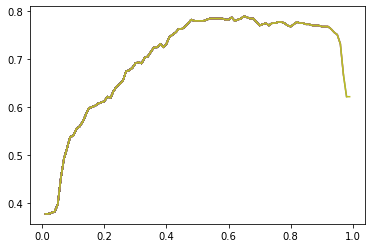

In [ ]:
# Threshold 조정
pred = model.predict(df_test)
xx = []
yy = []
for i in range(1, 100):
  pred_thr = Binarizer(threshold=i * 0.01).fit_transform(pred)
  xx.append(i * 0.01)
  yy.append(accuracy_score(pred_thr, perfect))
  plt.plot(xx, yy)
print('max : ', max(yy))
# if result_max < max(yy):
#   result_max = max(yy)
#   weights = model.get_weights()

In [ ]:
pred = model.predict(df_test)
pred_thr = Binarizer(threshold=0.72).fit_transform(pred)
accuracy_score(pred_thr, perfect)

14/14 [==============================] - 0s 3ms/step


0.80622009569378

In [ ]:
# # epochs별로 생성된 weights 중 가장 큰 값 저장
# model = Model(inputs=ip, outputs=n)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath, save_weights_only=True,
#     monitor='val_accuracy', mode='max', save_best_only=True)
# model.fit(X, y, epochs=1000, verbose=0, validation_split=0.2, callbacks=[model_checkpoint_callback])
# model.load_weights(checkpoint_filepath)

In [ ]:
a = []
for x in pred_thr:
  a.append(x[0])

In [ ]:
df = pd.read_csv('/content/submission.csv')
df.Survived = df.Survived.astype('int64')
df.to_csv('submission.csv', index=False)

In [ ]:
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": a
    })
submission.to_csv('submission.csv', index=False)

# HyperParameter Tunning

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner
from tensorflow import keras
def build_model(hp):
    ip = Input(shape=(X.shape[1],))
    n = BatchNormalization()(ip)
    n = Dense(hp.Choice('units', [5,7, 8, 10]),
              activation='tanh', kernel_initializer=keras.initializers.HeNormal())(n)
    n = Dropout(0.5)(n)
    n = BatchNormalization()(n)
    n = Dense(hp.Choice('units', [3, 5, 6, 7]),
              activation='tanh', kernel_initializer=keras.initializers.HeNormal())(n)
    n = BatchNormalization()(n)
    n = Dense(hp.Choice('units', [2, 3]),
              activation='tanh',kernel_initializer=keras.initializers.HeNormal())(n)
    n = BatchNormalization()(n)
    n = Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.HeNormal())(n)
    model = Model(inputs=ip, outputs=n)
    model.compile(loss='mse', optimizer='adam', metrics='accuracy')
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, directory='./tuner5')

In [ ]:
tuner.search(X, y, epochs=500, validation_split=0.2)
best_model = tuner.get_best_models()[0]

Trial 4 Complete [00h 01m 24s]
val_accuracy: 0.8715083599090576

Best val_accuracy So Far: 0.8826815485954285
Total elapsed time: 00h 05m 05s


In [ ]:
best_model.evaluate(df_test, perfect)

14/14 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.7847


[0.1653061807155609, 0.7846890091896057]

14/14 [==============================] - 0s 2ms/step
max :  0.7894736842105263


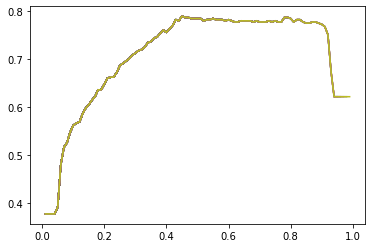

In [ ]:
pred = best_model.predict(df_test)
xx = []
yy = []
for i in range(1, 100):
  pred_thr = Binarizer(threshold=i * 0.01).fit_transform(pred)
  xx.append(i * 0.01)
  yy.append(accuracy_score(pred_thr, perfect))
  plt.plot(xx, yy)
print('max : ', max(yy))

In [ ]:
pred1= best_model.predict(X).reshape(-1)
pred2 = model1.predict(X).reshape(-1)
pred3 =  model2.predict(X).reshape(-1)

28/28 [==============================] - 0s 2ms/step


In [ ]:
pred  = np.array([pred1, pred2, pred3 ])
pred = pd.DataFrame(pred).T

In [ ]:
dc_final = RandomForestClassifier()
dc_final.fit(pred, y)

RandomForestClassifier()

In [ ]:
pred1= best_model.predict(df_test).reshape(-1)
pred2 = model1.predict(df_test).reshape(-1)
pred3 =  model2.predict(df_test).reshape(-1)
pred  = np.array([pred1, pred2, pred3 ])
pred = pd.DataFrame(pred).T
predict = dc_final.predict(pred)

14/14 [==============================] - 0s 2ms/step


In [ ]:
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)